In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Load dataset from google drive inserting path of a CSV file
data=pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

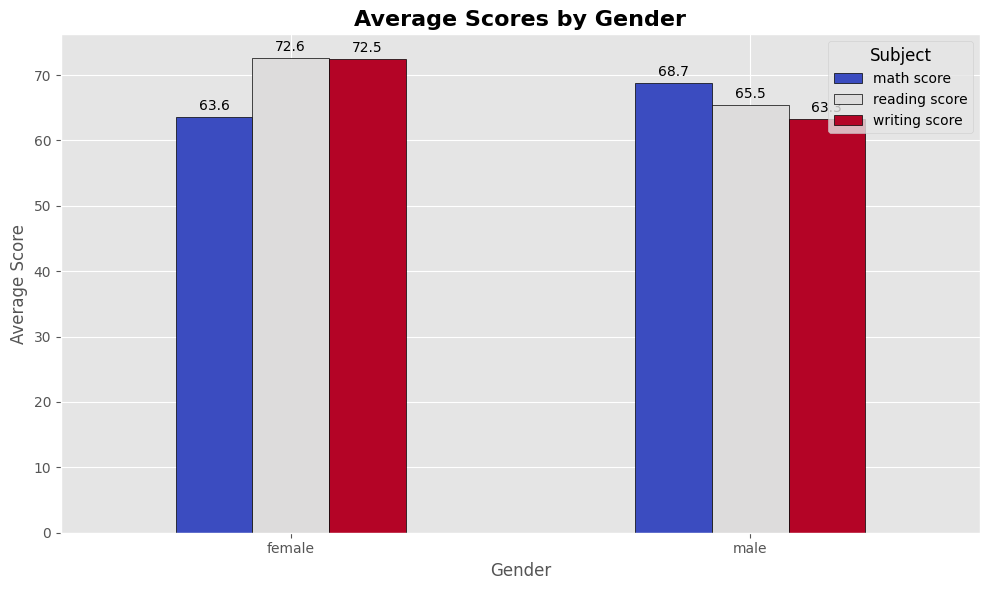

In [28]:
# Calculate average scores for male and female students
gender_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Set a creative style
plt.style.use('ggplot')  # Simple and clean style

# Plot grouped bar chart
ax = gender_scores.plot(
    kind='bar',
    figsize=(10,6),
    rot=0,
    colormap='coolwarm',  # Unique colormap
    edgecolor='black'      # Adds outline to bars
)

# Titles and labels
ax.set_title('Average Scores by Gender', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=12)
ax.set_xlabel('Gender', fontsize=12)

# Legend
ax.legend(title='Subject', title_fontsize=12, loc='upper right')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

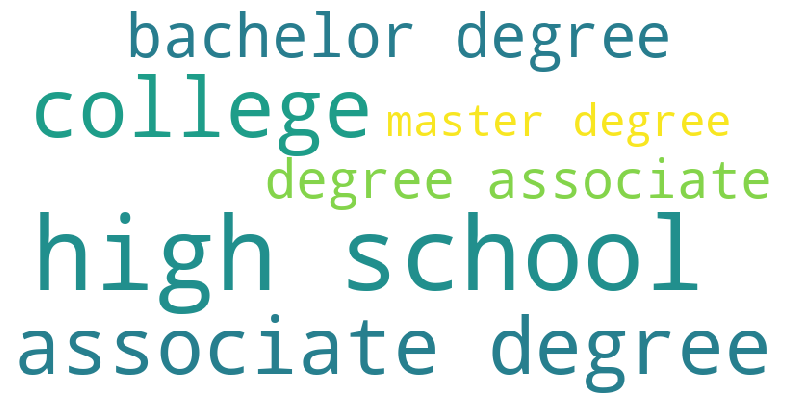

In [26]:


# Combine all the education levels into a single string
education_text = " ".join(data['parental level of education'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(education_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')
plt.show()